# Segmentación de Clientes de Tarjetas de Crédito con K Means

## 1. Análisis Exploratorio de los Datos (EDA)

### 1.1 Carga de Librerías

In [1]:
# Cargamos las librerías a utilizar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Para mostar las cifras en formato float
pd.options.display.float_format = '{:.2f}'.format

### 1.2 Carga de Datos

In [3]:
# Nombramos el dataframe
credit_card = pd.read_csv('.\..\data\CreditCard.csv')

# Mostramos un encabezado de los datos
credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.00,201.80,139.51,0.00,12
1,C10002,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.00,4103.03,1072.34,0.22,12
2,C10003,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.00,622.07,627.28,0.00,12
3,C10004,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500.00,0.00,NaN,0.00,12
4,C10005,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.00,678.33,244.79,0.00,12


In [3]:
# Mostramos el número de filas, columnas, valores NO nulos y el tipo de datos
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### 1.3 Estadística Descriptiva

In [4]:
# Resumimos las variables numéricas
credit_card.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.00,1564.47,2081.53,0.00,128.28,873.39,2054.14,19043.14
BALANCE_FREQUENCY,8950.00,0.88,0.24,0.00,0.89,1.00,1.00,1.00
PURCHASES,8950.00,1003.20,2136.63,0.00,39.64,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.00,592.44,1659.89,0.00,0.00,38.00,577.40,40761.25
INSTALLMENTS_PURCHASES,8950.00,411.07,904.34,0.00,0.00,89.00,468.64,22500.00
CASH_ADVANCE,8950.00,978.87,2097.16,0.00,0.00,0.00,1113.82,47137.21
PURCHASES_FREQUENCY,8950.00,0.49,0.40,0.00,0.08,0.50,0.92,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.00,0.20,0.30,0.00,0.00,0.08,0.30,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.00,0.36,0.40,0.00,0.00,0.17,0.75,1.00
CASH_ADVANCE_FREQUENCY,8950.00,0.14,0.20,0.00,0.00,0.00,0.22,1.50


### 1.4 Visualización de Variables Numéricas

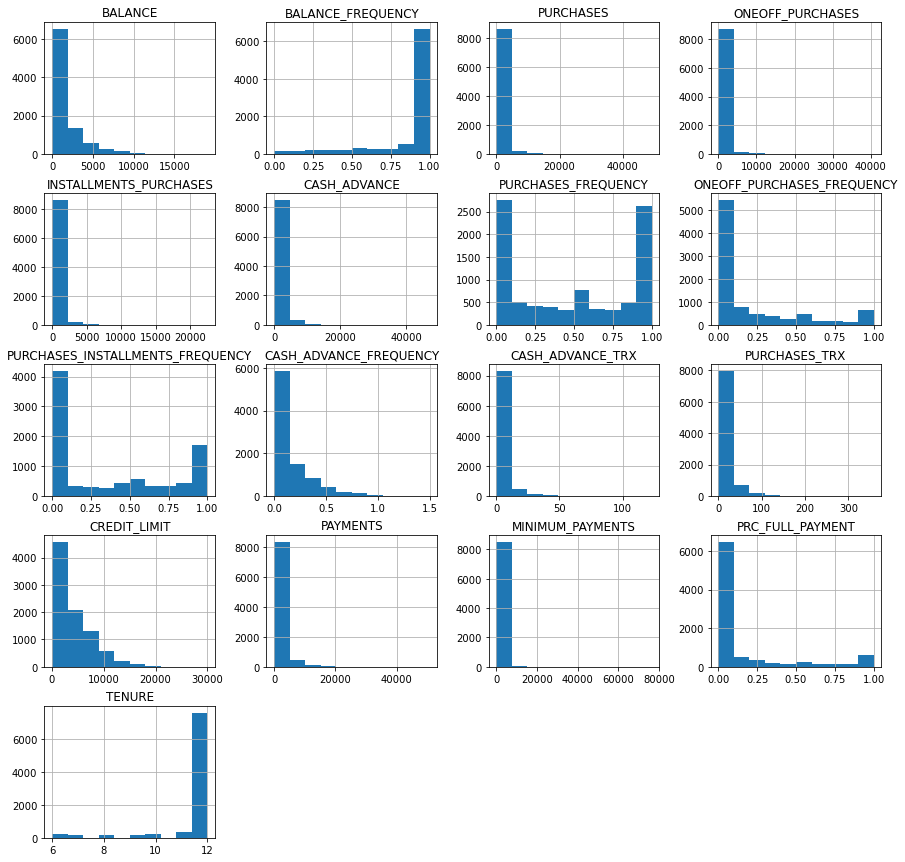

In [5]:
# Trazamos los histogramas
credit_card.hist(bins=10 , figsize=(15,15)) 
plt.show()

## 2. Preparación de los Datos

### 2.1 Limpieza de Datos

In [4]:
# Eliminamos la variable ID

credit_card = credit_card.drop(['CUST_ID'], axis = 1)
credit_card.shape

(8950, 17)

In [7]:
# Mostramos la suma de valores nulos de cada variable

credit_card.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# Imputamos los valores nulos

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value=0)

In [9]:
# Ajustamos y transformamos los valores nulos

credit_card = pd.DataFrame(imputer.fit_transform(credit_card),
                           columns = ['BALANCE',
                                      'BALANCE_FREQUENCY',
                                      'PURCHASES',
                                      'ONEOFF_PURCHASES',
                                      'INSTALLMENTS_PURCHASES',
                                      'CASH_ADVANCE',
                                      'PURCHASES_FREQUENCY',
                                      'ONEOFF_PURCHASES_FREQUENCY',
                                      'PURCHASES_INSTALLMENTS_FREQUENCY',
                                      'CASH_ADVANCE_FREQUENCY',
                                      'CASH_ADVANCE_TRX',
                                      'PURCHASES_TRX',
                                      'CREDIT_LIMIT',
                                      'PAYMENTS',
                                      'MINIMUM_PAYMENTS',
                                      'PRC_FULL_PAYMENT',
                                      'TENURE'])
credit_card.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
# Estandarizamos los datos númericos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
# Ajustamos y transformamos los datos

credit_card = pd.DataFrame(scaler.fit_transform(credit_card),
                           columns = ['BALANCE',
                                      'BALANCE_FREQUENCY',
                                      'PURCHASES',
                                      'ONEOFF_PURCHASES',
                                      'INSTALLMENTS_PURCHASES',
                                      'CASH_ADVANCE',
                                      'PURCHASES_FREQUENCY',
                                      'ONEOFF_PURCHASES_FREQUENCY',
                                      'PURCHASES_INSTALLMENTS_FREQUENCY',
                                      'CASH_ADVANCE_FREQUENCY',
                                      'CASH_ADVANCE_TRX',
                                      'PURCHASES_TRX',
                                      'CREDIT_LIMIT',
                                      'PAYMENTS',
                                      'MINIMUM_PAYMENTS',
                                      'PRC_FULL_PAYMENT',
                                      'TENURE'])
credit_card.shape

(8950, 17)

In [12]:
# Validamos los ajustes

credit_card.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.73,-0.25,-0.42,-0.36,-0.35,-0.47,-0.81,-0.68,-0.71,-0.68,-0.48,-0.51,-0.96,-0.53,-0.30,-0.53,0.36
1,0.79,0.13,-0.47,-0.36,-0.45,2.61,-1.22,-0.68,-0.92,0.57,0.11,-0.59,0.69,0.82,0.10,0.23,0.36
2,0.45,0.52,-0.11,0.11,-0.45,-0.47,1.27,2.67,-0.92,-0.68,-0.48,-0.11,0.83,-0.38,-0.09,-0.53,0.36
3,0.05,-1.02,0.23,0.55,-0.45,-0.37,-1.01,-0.40,-0.92,-0.26,-0.33,-0.55,0.83,-0.60,-0.36,-0.53,0.36
4,-0.36,0.52,-0.46,-0.35,-0.45,-0.47,-1.01,-0.40,-0.92,-0.68,-0.48,-0.55,-0.91,-0.36,-0.25,-0.53,0.36


## 3. Modelado

### 3.1 Determinación del número de clusters

<function matplotlib.pyplot.show(close=None, block=None)>

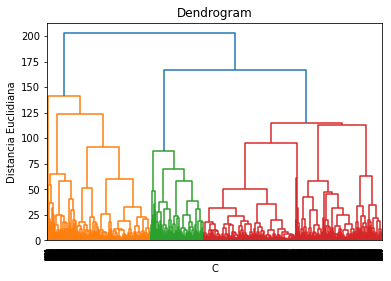

In [33]:
# Dibujamos el dendrograma

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(credit_card, method='ward'))

plt.title('Dendrogram')
plt.xlabel('C')
plt.ylabel('Distancia Euclidiana')
plt.show

### 3.2 Algoritmo K Means

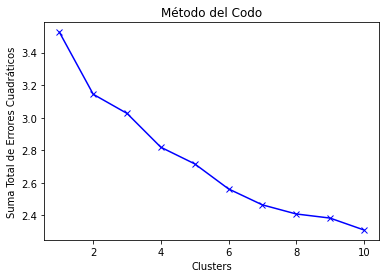

In [13]:
# Aplicamos el método del codo (cluster_centers_) para determinar el número de clusters

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

grupos = []
k = range(1, 11)
for n in k:
    kmeans = KMeans(n_clusters=n, max_iter=300)
    kmeans.fit(credit_card)
    grupos.append(sum(np.min(cdist(credit_card, kmeans.cluster_centers_, 'euclidean'), axis=1)) / credit_card.shape[0])

plt.plot(k, grupos, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Suma Total de Errores Cuadráticos')
plt.title('Método del Codo')
plt.show()

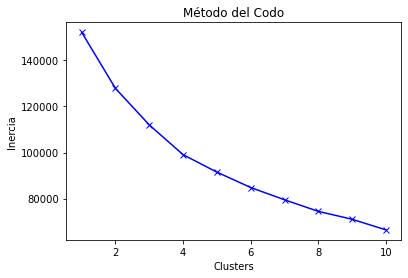

In [47]:
# Aplicamos el método del codo (inertia_) para determinar el número de clusters

from sklearn.cluster import KMeans

inercia = []
k = range(1, 11)
for n in k:
    kmeans = KMeans(n_clusters=n, max_iter=300)
    kmeans.fit(credit_card)
    inercia.append(kmeans.inertia_)

plt.plot(k, inercia, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

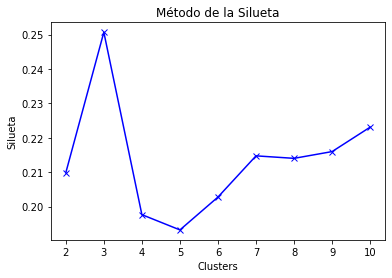

In [48]:
# Aplicamos el método de la silueta para determinar el número de clusters

from sklearn.metrics import silhouette_score

silueta = []
k = range(2, 11)
for n in k:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(credit_card)
    labels = kmeans.labels_
    silueta.append(silhouette_score(credit_card, labels, metric='euclidean'))
    
plt.plot(k, silueta, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Silueta')
plt.title('Método de la Silueta')
plt.show()

In [14]:
# Ajustamos el algoritmo KMeans con n_clusters

kmeans = KMeans(n_clusters=3)
df_kmeans = credit_card.copy()
y_pred = kmeans.fit_predict(df_kmeans)

df_kmeans['LABEL'] = y_pred
df_kmeans.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LABEL
0,-0.73,-0.25,-0.42,-0.36,-0.35,-0.47,-0.81,-0.68,-0.71,-0.68,-0.48,-0.51,-0.96,-0.53,-0.30,-0.53,0.36,2
1,0.79,0.13,-0.47,-0.36,-0.45,2.61,-1.22,-0.68,-0.92,0.57,0.11,-0.59,0.69,0.82,0.10,0.23,0.36,0
2,0.45,0.52,-0.11,0.11,-0.45,-0.47,1.27,2.67,-0.92,-0.68,-0.48,-0.11,0.83,-0.38,-0.09,-0.53,0.36,2
3,0.05,-1.02,0.23,0.55,-0.45,-0.37,-1.01,-0.40,-0.92,-0.26,-0.33,-0.55,0.83,-0.60,-0.36,-0.53,0.36,2
4,-0.36,0.52,-0.46,-0.35,-0.45,-0.47,-1.01,-0.40,-0.92,-0.68,-0.48,-0.55,-0.91,-0.36,-0.25,-0.53,0.36,2
5,0.12,0.52,0.15,-0.36,1.02,-0.47,0.44,-0.68,0.55,-0.68,-0.48,-0.27,-0.74,-0.12,0.67,-0.53,0.36,2
6,-0.45,0.52,2.85,3.50,0.31,-0.47,1.27,2.67,1.60,-0.68,-0.48,1.98,2.48,1.60,-0.27,2.89,0.36,1
7,0.12,0.52,-0.27,-0.36,0.03,-0.47,1.27,-0.68,1.60,-0.68,-0.48,-0.11,-0.60,-0.36,-0.13,-0.53,0.36,2
8,-0.26,0.52,-0.07,0.04,-0.23,-0.47,-0.39,-0.40,-0.29,-0.68,-0.48,-0.39,0.69,-0.36,-0.22,-0.53,0.36,2
9,-0.68,-1.40,0.13,0.42,-0.45,-0.47,-0.81,-0.12,-0.92,-0.68,-0.48,-0.47,1.79,-0.20,-0.31,-0.53,0.36,2


In [20]:
# Reducción de dimensiones aplicando PCA

from sklearn.decomposition import PCA

k = 2
pca = PCA(n_components=2)
credit_card_pc = pca.fit_transform(credit_card)
print(f"Explained Variance: {pca.explained_variance_ratio_}")
print(f"Sum Explained Variance: {pca.explained_variance_ratio_.sum()}")
#print(f"Components: {pca.components_}")
credit_card_pc = pd.DataFrame(data=credit_card_pc,
                 columns=['PC1',
                          'PC2'])

df_kmeans_pc = pd.concat([credit_card_pc, df_kmeans[['LABEL']]], axis=1)
df_kmeans_pc.head(10)

Explained Variance: [0.27302279 0.20319808]
Sum Explained Variance: 0.47622087383542155


,PC1,PC2,LABEL
0,-1.68,-1.07,2
1,-1.13,2.51,0
2,0.97,-0.38,2
3,-0.90,-0.02,2
4,-1.60,-0.68,2
5,0.25,-0.77,2
6,6.35,-0.71,1
7,0.28,-1.29,2
8,-0.44,-0.46,2
9,-0.56,-0.37,2


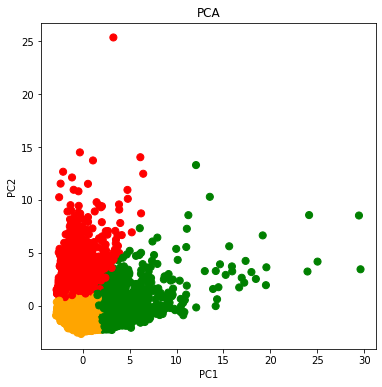

In [16]:
# Graficamos los componentes

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA')

color_theme = np.array(["red", "green", "orange"])
ax.scatter(x = df_kmeans_pc[['PC1']], y = df_kmeans_pc[['PC2']],
          c=color_theme[df_kmeans_pc['LABEL']], s=50)
plt.show()